# Exploring my Marathon Training Plan based on my Strava Data

Importing data from Strava, cleaning the data, and creating a new graph.

In this example I attempt to see if my actual Marathon training followed the proposed training plan. To do this I will:  
1) import data from Strava
2) format the data and get only my marathon data
3) import the target training plan
4) compare my performance against the plan graphically

It's a Python learning exercise more than an exercise in how to improve my marathon time - although I did learn a few things about how I could improve my marathon times!

## Step 1

Import the programming tools needed for the job.

In [1]:
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt

## Step 2

Import the Strava data. This is data that I have previously downloaded from Strava. You can download your own data from this link: https://www.strava.com/athlete/delete_your_account (select 'Request Your Archive' in Step 2).

In [2]:
#import the activities.

all_strava_activities = pd.read_csv('activities.csv', index_col=None, na_values=['NA'])

In [3]:
#view the top 5 rows

all_strava_activities.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Relative Effort,Commute,Activity Gear,Filename
0,2413516305,"Jun 1, 2019, 7:58:22 AM",Base run.,Run,NaN,2879,8.00,NaN,False,NaN,activities/2413516305.gpx
1,2420212550,"Jun 3, 2019, 7:10:20 AM",Morning Run,Run,NaN,3071,7.16,NaN,False,NaN,activities/2420212550.gpx
2,2425948821,"Jun 5, 2019, 3:40:34 PM",Along the Zugersee,Run,Caught a strong whiff of dog shit along the wa...,3042,8.93,NaN,False,NaN,activities/2425948821.gpx
3,2427696113,"Jun 6, 2019, 7:12:33 AM",One runner down run.,Run,Cool but scenic. Hanan down with a pulled leg ...,4866,10.93,NaN,False,NaN,activities/2427696113.gpx
4,2430190980,"Jun 7, 2019, 6:51:09 AM",Zugerberg Middle,Run,"with dusty, lea and kathy",1773,5.08,NaN,False,NaN,activities/2430190980.gpx


## Step 3

Clean up the data a little. 

In [4]:
#remove unnecessary columns from the dataframe
all_strava_activities.drop(['Activity ID', 'Activity Name', 'Activity Description','Relative Effort', 'Commute', 'Activity Gear', 'Filename'], axis=1, inplace=True)

#rename some of the fields for easier use later on
all_strava_activities = all_strava_activities.rename(columns={'Activity Date': 'Date', 'Activity Type': 'Activity_Type', 'Elapsed Time': 'Elapsed_Time'})



In [5]:
#it's good to check the data field types so I know what I'm dealing with if any coversions are needed.

all_strava_activities.dtypes

Date              object
Activity_Type     object
Elapsed_Time       int64
Distance         float64
dtype: object

In [6]:
#change the date column to a proper date format.

all_strava_activities['Date'] = pd.to_datetime(all_strava_activities['Date'])

In [7]:
#I'm really only interested in the activities during the training period.

#Set the training period start (tps) and end (tpe)
tps = pd.to_datetime('2019-06-13')
tpe = pd.to_datetime('2019-10-14')

#then show the new df based on those filter criteria
training_period = all_strava_activities.loc[(all_strava_activities['Date'] >= tps) & (all_strava_activities['Date'] < tpe), :]

In [8]:
training_period.head()

,Date,Activity_Type,Elapsed_Time,Distance
8,2019-06-13 07:07:29,Long Run,2584,7.35
9,2019-06-13 14:45:37,Long Run,5583,14.17
10,2019-06-15 10:39:24,Run,1658,4.81
11,2019-06-17 07:12:03,Run,1996,5.70
12,2019-06-19 07:31:02,Pace,1634,5.74


## Step 4 

Import some comparative data which is the target training plan 

In [9]:
#import the target training plan and clean it up a bit.
HH = pd.read_csv('Hal_Higdon_Plan.csv', index_col=None)
HH['KMs'].fillna(0, inplace=True)
HH['Date'] = pd.to_datetime(HH.Date)

In [10]:
#view the top 5 rows

HH.head()

,Date,Hal Higdon N2,KMs
0,2019-06-10,rest,0.0
1,2019-06-11,run,4.8
2,2019-06-12,pace,8.1
3,2019-06-13,run,4.8
4,2019-06-14,rest,0.0


## Step 5

Compare the data graphically.

In [11]:
%matplotlib inline

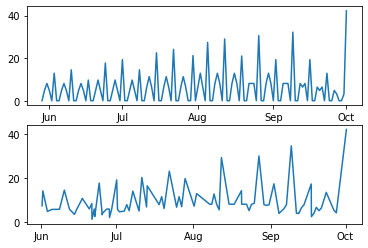

In [13]:
ax = plt.subplot(2,1,1)
plt.plot(HH.Date, HH.KMs)
ax.set_xticks(['2019-06-13', '2019-07-13','2019-08-13', '2019-09-13', '2019-10-13'])
ax.set_xticklabels(['Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax = plt.subplot(2,1,2)
plt.plot(training_period.Date, training_period.Distance)
ax.set_xticks(['2019-06-13', '2019-07-13','2019-08-13', '2019-09-13', '2019-10-13'])
ax.set_xticklabels(['Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

plt.show
plt.savefig('Comparison')